In [129]:
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics, linear_model, tree, ensemble
import seaborn as sns
import matplotlib.pyplot as plt

# СЛУЧАЙНЫЙ ЛЕС

In [33]:
data_w = pd.read_csv('data/weatherAUS.csv')
data_w.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [34]:
# общее количество пропусков
data_w.isna().sum().sum()

343248

In [35]:
# очистим от пропусков столбцы, выкинем те, у которых более 40% пропусков
thresh = data_w.shape[0] * 0.6
data_w.dropna(thresh=thresh, axis=1, inplace=True)

In [36]:
data_w.shape

(145460, 20)

In [37]:
map_dict = {'No':0, 'Yes': 1}
data_w['RainToday'] = data_w['RainToday'].map(map_dict)
data_w['RainToday'].unique()

array([ 0.,  1., nan])

In [38]:
data_w['RainToday'].mean().round(2)

0.22

In [39]:
data_w['RainTomorrow'] = data_w['RainTomorrow'].map(map_dict)
data_w['RainTomorrow'].unique()

array([ 0.,  1., nan])

In [40]:
# создаем столбец с месяцем
data_w['Month'] = pd.to_datetime(data_w['Date'], format='%Y-%m-%d').dt.month
data_w.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,0.0,0.0,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,21.0,23.2,0.0,0.0,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,0.0,0.0,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0.0,0.0,12


In [41]:
# удаляем столбец
del data_w['Date']
data_w.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,16.9,21.8,0.0,0.0,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,17.2,24.3,0.0,0.0,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,21.0,23.2,0.0,0.0,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,18.1,26.5,0.0,0.0,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,17.8,29.7,0.0,0.0,12


In [51]:
data_w.groupby('Month').mean()['RainToday'].sort_values(ascending=False)

C:\Users\vadim.kopytko\AppData\Local\Temp\ipykernel_5460\76274947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_w.groupby('Month').mean()['RainToday'].sort_values(ascending=False)


Month
7     0.270736
6     0.263638
8     0.253167
9     0.229135
5     0.222163
3     0.217135
4     0.216845
12    0.213037
11    0.210843
2     0.206746
10    0.196512
1     0.189484
Name: RainToday, dtype: float64

In [52]:
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
data_w_dummy = pd.get_dummies(data_w, columns=categoricals)
data_w_dummy.shape

(145460, 124)

In [85]:
data_w_dummy = data_w_dummy.dropna()

In [86]:
X = data_w_dummy.drop('RainTomorrow', axis=1)
y = data_w_dummy[['RainTomorrow']]

In [87]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=31)
y_test.mean()

RainTomorrow    0.227703
dtype: float64

In [88]:
X_train_ir = X_train.copy()

In [89]:
X_train_ir = X_train_ir.reset_index()

In [90]:
mintemp_list = []
for i in range(1000):
    inds = np.random.randint(X_train_ir.shape[0], size=X_train_ir.shape[0])
    mintemp_list.append(X_train_ir['MinTemp'].iloc[inds].mean())
print(np.round(np.std(mintemp_list), 2))

0.03


In [91]:
lg = linear_model.LogisticRegression()
lg.fit(X_train, y_train)
y_test_pred_lg = lg.predict(X_test)
print(np.round( metrics.roc_auc_score(y_test, y_test_pred_lg), 2))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.73


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}

gs = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    cv=3,
    param_grid=params,
    verbose=True,
).fit(X_train, y_train)
gs.best_params_


Fitting 3 folds for each of 96 candidates, totalling 288 fits


{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}

In [99]:
dt = tree.DecisionTreeClassifier(**gs.best_params_, random_state=42).fit(X_train, y_train)
y_test_pred_dt = dt.predict(X_test)
print(np.round( metrics.roc_auc_score(y_test, y_test_pred_dt), 2))

0.7


In [100]:
rf = ensemble.RandomForestClassifier(
    n_estimators=100, 
    random_state=31,
    verbose=True,
    n_jobs=-1).fit(X_train, y_train)
y_test_pred_rf = rf.predict(X_test)
print(np.round(metrics.roc_auc_score(y_test, y_test_pred_rf), 2))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.73


In [103]:
params_2 = {'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}

gs_rf = model_selection.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state = 31),
    cv=3,
    param_grid=params_2,
    verbose=3
)
gs_rf.fit(X_train, y_train)
gs_rf.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.776 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=3;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.776 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=5;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.776 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=7;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=9;, score=0.776 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=9;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=9;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=4, min_samples_leaf=11;, score=0.776 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=4, min_samples_leaf=11;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=4, min_samples_leaf=11;, score=0.775 total time=   0.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=3;, score=0.782 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=3;, score=0.780 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=3;, score=0.781 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=5;, score=0.781 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=5;, score=0.781 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=5;, score=0.781 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=7;, score=0.782 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=7;, score=0.780 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=7;, score=0.782 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=9;, score=0.782 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=9;, score=0.779 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=9;, score=0.781 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=5, min_samples_leaf=11;, score=0.784 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=5, min_samples_leaf=11;, score=0.781 total time=   1.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=5, min_samples_leaf=11;, score=0.783 total time=   0.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=6, min_samples_leaf=3;, score=0.795 total time=   1.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=6, min_samples_leaf=3;, score=0.793 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=6, min_samples_leaf=3;, score=0.796 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=6, min_samples_leaf=5;, score=0.793 total time=   1.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=6, min_samples_leaf=5;, score=0.792 total time=   1.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=6, min_samples_leaf=5;, score=0.795 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=6, min_samples_leaf=7;, score=0.798 total time=   1.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=6, min_samples_leaf=7;, score=0.794 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=6, min_samples_leaf=7;, score=0.795 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=6, min_samples_leaf=9;, score=0.796 total time=   1.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=6, min_samples_leaf=9;, score=0.795 total time=   1.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=6, min_samples_leaf=9;, score=0.795 total time=   1.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=6, min_samples_leaf=11;, score=0.795 total time=   1.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=6, min_samples_leaf=11;, score=0.798 total time=   1.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=6, min_samples_leaf=11;, score=0.795 total time=   1.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=3;, score=0.798 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=3;, score=0.801 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=3;, score=0.794 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=5;, score=0.798 total time=   1.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=5;, score=0.801 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=5;, score=0.797 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=7;, score=0.794 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=7;, score=0.800 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=7;, score=0.795 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=9;, score=0.796 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=9;, score=0.800 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=9;, score=0.795 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=5, max_features=7, min_samples_leaf=11;, score=0.796 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=5, max_features=7, min_samples_leaf=11;, score=0.803 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=5, max_features=7, min_samples_leaf=11;, score=0.795 total time=   1.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=4, min_samples_leaf=3;, score=0.810 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=4, min_samples_leaf=3;, score=0.815 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=4, min_samples_leaf=3;, score=0.813 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=4, min_samples_leaf=5;, score=0.812 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=4, min_samples_leaf=5;, score=0.811 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=4, min_samples_leaf=5;, score=0.813 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=4, min_samples_leaf=7;, score=0.811 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=4, min_samples_leaf=7;, score=0.812 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=4, min_samples_leaf=7;, score=0.812 total time=   1.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=4, min_samples_leaf=9;, score=0.809 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=4, min_samples_leaf=9;, score=0.812 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=4, min_samples_leaf=9;, score=0.811 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=4, min_samples_leaf=11;, score=0.813 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=4, min_samples_leaf=11;, score=0.812 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=4, min_samples_leaf=11;, score=0.813 total time=   1.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=3;, score=0.819 total time=   1.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=3;, score=0.826 total time=   1.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=3;, score=0.820 total time=   1.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=5;, score=0.821 total time=   1.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=5;, score=0.826 total time=   1.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=5;, score=0.820 total time=   1.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=7;, score=0.820 total time=   1.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=7;, score=0.819 total time=   1.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=7;, score=0.820 total time=   1.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=9;, score=0.819 total time=   1.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=9;, score=0.824 total time=   2.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=9;, score=0.816 total time=   2.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=5, min_samples_leaf=11;, score=0.822 total time=   1.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=5, min_samples_leaf=11;, score=0.826 total time=   1.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=5, min_samples_leaf=11;, score=0.817 total time=   1.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=6, min_samples_leaf=3;, score=0.832 total time=   2.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=6, min_samples_leaf=3;, score=0.834 total time=   3.7s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=6, min_samples_leaf=3;, score=0.830 total time=   3.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=6, min_samples_leaf=5;, score=0.829 total time=   3.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=6, min_samples_leaf=5;, score=0.835 total time=   3.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=6, min_samples_leaf=5;, score=0.828 total time=   2.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=6, min_samples_leaf=7;, score=0.831 total time=   2.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=6, min_samples_leaf=7;, score=0.835 total time=   2.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=6, min_samples_leaf=7;, score=0.831 total time=   2.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=6, min_samples_leaf=9;, score=0.830 total time=   2.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=6, min_samples_leaf=9;, score=0.835 total time=   2.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=6, min_samples_leaf=9;, score=0.831 total time=   2.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=6, min_samples_leaf=11;, score=0.831 total time=   2.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=6, min_samples_leaf=11;, score=0.835 total time=   2.3s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=6, min_samples_leaf=11;, score=0.827 total time=   2.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=3;, score=0.833 total time=   2.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=3;, score=0.839 total time=   2.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=3;, score=0.831 total time=   2.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=5;, score=0.834 total time=   2.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=5;, score=0.838 total time=   3.7s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=5;, score=0.832 total time=   3.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=7;, score=0.831 total time=   3.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=7;, score=0.838 total time=   3.7s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=7;, score=0.829 total time=   3.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=9;, score=0.833 total time=   4.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=9;, score=0.838 total time=   4.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=9;, score=0.831 total time=   3.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=10, max_features=7, min_samples_leaf=11;, score=0.834 total time=   3.7s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=10, max_features=7, min_samples_leaf=11;, score=0.837 total time=   4.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=10, max_features=7, min_samples_leaf=11;, score=0.828 total time=   4.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=4, min_samples_leaf=3;, score=0.829 total time=   4.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=4, min_samples_leaf=3;, score=0.836 total time=   4.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=4, min_samples_leaf=3;, score=0.829 total time=   4.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=4, min_samples_leaf=5;, score=0.828 total time=   4.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=4, min_samples_leaf=5;, score=0.834 total time=   4.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=4, min_samples_leaf=5;, score=0.829 total time=   3.7s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=4, min_samples_leaf=7;, score=0.828 total time=   3.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=4, min_samples_leaf=7;, score=0.832 total time=   3.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=4, min_samples_leaf=7;, score=0.827 total time=   3.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=4, min_samples_leaf=9;, score=0.825 total time=   2.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=4, min_samples_leaf=9;, score=0.832 total time=   2.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=4, min_samples_leaf=9;, score=0.824 total time=   2.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=4, min_samples_leaf=11;, score=0.826 total time=   2.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=4, min_samples_leaf=11;, score=0.831 total time=   2.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=4, min_samples_leaf=11;, score=0.824 total time=   2.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=5, min_samples_leaf=3;, score=0.832 total time=   3.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=5, min_samples_leaf=3;, score=0.843 total time=   3.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=5, min_samples_leaf=3;, score=0.833 total time=   3.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=5, min_samples_leaf=5;, score=0.835 total time=   7.7s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=5, min_samples_leaf=5;, score=0.843 total time=   8.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=5, min_samples_leaf=5;, score=0.834 total time=   6.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=5, min_samples_leaf=7;, score=0.834 total time=   6.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=5, min_samples_leaf=7;, score=0.839 total time=   5.3s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=5, min_samples_leaf=7;, score=0.830 total time=   3.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=5, min_samples_leaf=9;, score=0.832 total time=   3.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=5, min_samples_leaf=9;, score=0.838 total time=   2.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=5, min_samples_leaf=9;, score=0.831 total time=   2.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=5, min_samples_leaf=11;, score=0.834 total time=   2.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=5, min_samples_leaf=11;, score=0.838 total time=   2.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=5, min_samples_leaf=11;, score=0.831 total time=   2.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=6, min_samples_leaf=3;, score=0.841 total time=   3.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=6, min_samples_leaf=3;, score=0.847 total time=   3.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=6, min_samples_leaf=3;, score=0.840 total time=   3.2s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=6, min_samples_leaf=5;, score=0.842 total time=   3.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=6, min_samples_leaf=5;, score=0.847 total time=   3.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=6, min_samples_leaf=5;, score=0.839 total time=   3.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=6, min_samples_leaf=7;, score=0.842 total time=   3.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=6, min_samples_leaf=7;, score=0.845 total time=   2.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=6, min_samples_leaf=7;, score=0.841 total time=   3.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=6, min_samples_leaf=9;, score=0.840 total time=   3.1s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=6, min_samples_leaf=9;, score=0.845 total time=   3.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=6, min_samples_leaf=9;, score=0.837 total time=   3.0s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=6, min_samples_leaf=11;, score=0.840 total time=   2.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=6, min_samples_leaf=11;, score=0.846 total time=   2.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=6, min_samples_leaf=11;, score=0.838 total time=   2.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=7, min_samples_leaf=3;, score=0.845 total time=   3.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=7, min_samples_leaf=3;, score=0.850 total time=   3.9s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=7, min_samples_leaf=3;, score=0.845 total time=   3.8s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=7, min_samples_leaf=5;, score=0.844 total time=   3.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=7, min_samples_leaf=5;, score=0.849 total time=   3.7s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=7, min_samples_leaf=5;, score=0.844 total time=   3.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=7, min_samples_leaf=7;, score=0.842 total time=   3.6s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=7, min_samples_leaf=7;, score=0.850 total time=   3.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=7, min_samples_leaf=7;, score=0.841 total time=   3.7s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=7, min_samples_leaf=9;, score=0.842 total time=   3.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=7, min_samples_leaf=9;, score=0.848 total time=   3.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=7, min_samples_leaf=9;, score=0.841 total time=   3.5s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/3] END max_depth=15, max_features=7, min_samples_leaf=11;, score=0.840 total time=   3.3s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 2/3] END max_depth=15, max_features=7, min_samples_leaf=11;, score=0.847 total time=   3.3s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/3] END max_depth=15, max_features=7, min_samples_leaf=11;, score=0.840 total time=   3.4s


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'max_depth': 15, 'max_features': 7, 'min_samples_leaf': 3}

In [107]:
dt_opt = ensemble.RandomForestClassifier(
    n_estimators=100,
    **gs_rf.best_params_,
    random_state=42).fit(X_train, y_train)
y_test_pred_dt_opt = dt_opt.predict(X_test)
print(np.round( metrics.roc_auc_score(y_test, y_test_pred_dt_opt), 2))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7


In [111]:
df_f = pd.DataFrame({'features': X_train.columns,'coef': dt_opt.feature_importances_})
df_f.sort_values(by='coef', ascending=False)

,features,coef
7,Humidity3pm,0.245610
2,Rainfall,0.089892
10,Cloud9am,0.077081
6,Humidity9am,0.066047
9,Pressure3pm,0.060751
...,...,...
72,Location_Witchcliffe,0.000000
43,Location_Launceston,0.000000
49,Location_MountGinini,0.000000
50,Location_Newcastle,0.000000


# БУСТИНГ

In [170]:
import xgboost
import catboost
from catboost.utils import get_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [118]:
air = pd.read_csv('data/AirPass.csv', index_col=0)
air.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [120]:
# посмотрим на пропуски 
air.isna().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [121]:
# заполним пропуски медианным значением
air['Arrival Delay in Minutes'] = air['Arrival Delay in Minutes'].fillna(air['Arrival Delay in Minutes'].median())
air['Arrival Delay in Minutes'].mean()

15.133392362180475

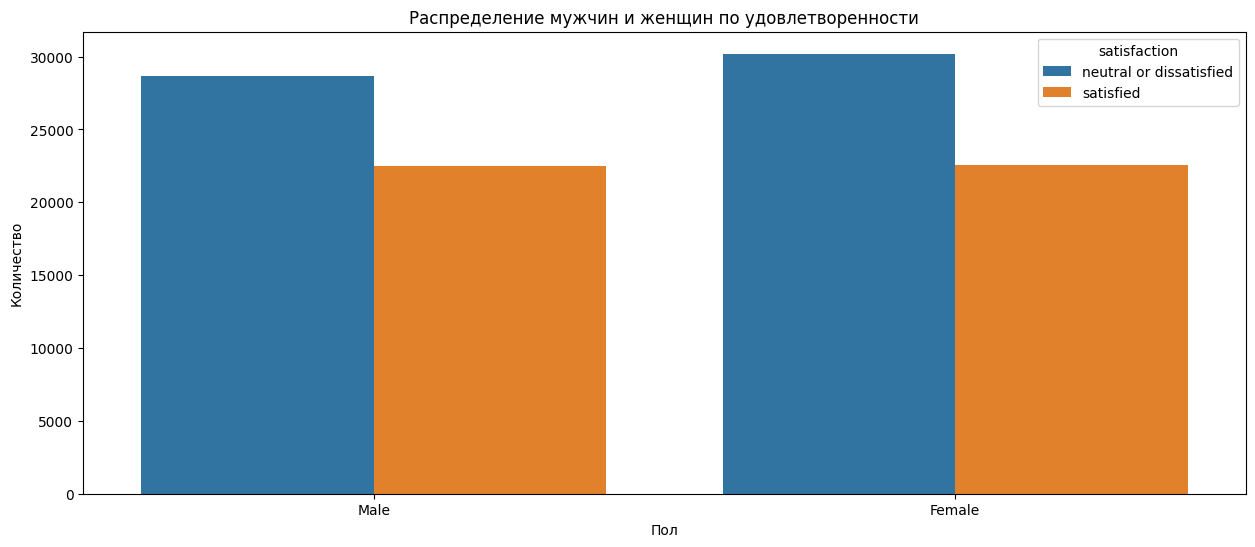

In [133]:
fig = plt.figure(figsize=(15,6))
cp = sns.countplot(
    air,
    x = 'Gender',
    hue='satisfaction'
)
cp.set(title='Распределение мужчин и женщин по удовлетворенности', xlabel='Пол', ylabel='Количество');

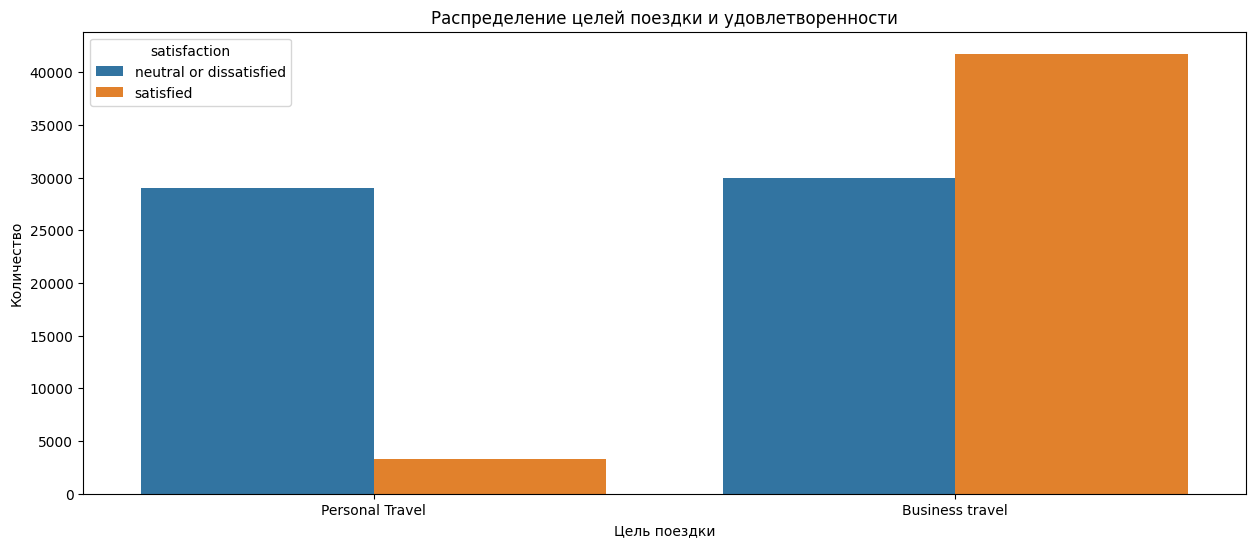

In [134]:
fig = plt.figure(figsize=(15,6))
cp = sns.countplot(
    air,
    x = 'Type of Travel',
    hue='satisfaction'
)
cp.set(title='Распределение целей поездки и удовлетворенности', xlabel='Цель поездки', ylabel='Количество');

In [136]:
air[air['satisfaction'] == 'satisfied'].groupby('Class')['id'].count().sort_values(ascending=False)

Class
Business    34480
Eco          8701
Eco Plus     1844
Name: id, dtype: int64

In [137]:
air['satisfaction'] = air['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
air['Customer Type'] = air['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
air['Type of Travel'] = air['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
air['Gender'] = air['Gender'].map({'Male': 0, 'Female': 1})

In [143]:
# проверим, какие столбцы остались категориальными
air.select_dtypes('object').columns

Index(['Class'], dtype='object')

In [144]:
# закидируем столбец Класса с помощью OHE
air = pd.get_dummies(air, ['Class'])

In [145]:
# итоговый размер датасета
air.shape

(103904, 26)

In [146]:
# разобьем столбцы на признаки и целевую переменную
X = air.drop('satisfaction', axis=1)
y = air[['satisfaction']]

In [149]:
# разобьем признаки на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=26)
X_test.shape

(20781, 25)

In [151]:
# стандартизируем данные
scale = StandardScaler().fit(X_train)
X_train_scaled = scale.transform(X_train)
X_test_scaled = scale.transform(X_test)

In [156]:
# модель логистической регрессии
lg = linear_model.LogisticRegression().fit(X_train_scaled, y_train)
y_train_pred_lg = lg.predict(X_train_scaled)
y_test_pred_lg = lg.predict(X_test_scaled)
print('f1 train: {}'.format(np.round(metrics.f1_score(y_train, y_train_pred_lg), 3)))
print('f1 test: {}'.format(np.round(metrics.f1_score(y_test, y_test_pred_lg), 3)))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1 train: 0.854
f1 test: 0.855


In [157]:
# ансамбль AdaBoost
ab = ensemble.AdaBoostClassifier(
    estimator=tree.DecisionTreeClassifier(random_state = 26),
    learning_rate=0.01)
ab.fit(X_train_scaled, y_train)
y_train_pred_ab = ab.predict(X_train_scaled)
y_test_pred_ab = ab.predict(X_test_scaled)
print('f1 train: {}'.format(np.round(metrics.f1_score(y_train, y_train_pred_ab), 3)))
print('f1 test: {}'.format(np.round(metrics.f1_score(y_test, y_test_pred_ab), 3)))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


f1 train: 1.0
f1 test: 0.941


In [159]:
# ансамбль AdaBoost
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}

gs_gb = model_selection.GridSearchCV(
    ensemble.GradientBoostingClassifier(), 
    params,
    n_jobs=-1,
    verbose=True,
    scoring='f1')
gs_gb.fit(X_train_scaled, y_train)
gs_gb.scorer_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


make_scorer(f1_score, average=binary)

In [164]:
gs_gb.best_score_.round(3)

0.95

In [167]:
xgb = xgboost.XGBClassifier(random_state = 26)
xgb.fit(X_train_scaled, y_train)

y_train_pred_xgb = xgb.predict(X_train_scaled)
y_test_pred_xgb = xgb.predict(X_test_scaled)
print('f1 train: {}'.format(np.round(metrics.f1_score(y_train, y_train_pred_xgb), 3)))
print('f1 test: {}'.format(np.round(metrics.f1_score(y_test, y_test_pred_xgb), 3)))

f1 train: 0.976
f1 test: 0.957


In [168]:
cat = catboost.CatBoostClassifier(random_state = 26)
cat.fit(X_train_scaled, y_train)

y_train_pred_cat = cat.predict(X_train_scaled)
y_test_pred_cat = cat.predict(X_test_scaled)
print('f1 train: {}'.format(np.round(metrics.f1_score(y_train, y_train_pred_cat), 3)))
print('f1 test: {}'.format(np.round(metrics.f1_score(y_test, y_test_pred_cat), 3)))

Learning rate set to 0.068023
0:	learn: 0.6018089	total: 141ms	remaining: 2m 20s
1:	learn: 0.5020769	total: 154ms	remaining: 1m 16s
2:	learn: 0.4472481	total: 166ms	remaining: 55.2s
3:	learn: 0.4028675	total: 179ms	remaining: 44.6s
4:	learn: 0.3674724	total: 192ms	remaining: 38.3s
5:	learn: 0.3397844	total: 208ms	remaining: 34.5s
6:	learn: 0.3121211	total: 254ms	remaining: 36s
7:	learn: 0.2917499	total: 297ms	remaining: 36.8s
8:	learn: 0.2749039	total: 324ms	remaining: 35.7s
9:	learn: 0.2575191	total: 341ms	remaining: 33.7s
10:	learn: 0.2473690	total: 354ms	remaining: 31.8s
11:	learn: 0.2377531	total: 365ms	remaining: 30s
12:	learn: 0.2279309	total: 377ms	remaining: 28.6s
13:	learn: 0.2212512	total: 390ms	remaining: 27.5s
14:	learn: 0.2100359	total: 405ms	remaining: 26.6s
15:	learn: 0.2025733	total: 422ms	remaining: 26s
16:	learn: 0.1942303	total: 434ms	remaining: 25.1s
17:	learn: 0.1877939	total: 448ms	remaining: 24.4s
18:	learn: 0.1832381	total: 462ms	remaining: 23.8s
19:	learn: 0.17

In [176]:
# выведем матрицу ошибок для модели CatBoost
np.round(get_confusion_matrix(cat, catboost.Pool(X_train_scaled, y_train))/X_train_scaled.shape[0] * 100, 0)

array([[56.,  1.],
       [ 2., 42.]])

In [179]:
# датасет важности признаков
df_cat = pd.DataFrame({'features': X_train.columns, 'coef': cat.feature_importances_})
df_cat.sort_values(by='coef', ascending=False)

,features,coef
6,Inflight wifi service,25.364737
4,Type of Travel,18.391876
11,Online boarding,7.401483
2,Customer Type,7.240564
22,Class_Business,5.420057
17,Checkin service,3.925791
3,Age,3.742350
16,Baggage handling,3.640798
9,Gate location,3.196286
12,Seat comfort,3.012455
